# **1. Perkenalan Dataset**


Pada bagian ini, kita akan memperkenalkan dataset yang digunakan dalam eksperimen, termasuk sumber dan deskripsi singkat mengenai isi dataset.

Tahap pertama adalah mencari dan menggunakan dataset sesuai ketentuan berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari [Kaggle - Retail Case Study Data](https://www.kaggle.com/datasets/darpan25bajaj/retail-case-study-data).

2. **Deskripsi Dataset**:  
   Dataset ini terdiri dari tiga file CSV yang berisi informasi transaksi ritel:
   - **Customer.csv**: Data demografis pelanggan
   - **Transactions.csv**: Data transaksi yang dilakukan pelanggan
   - **prod_cat_info.csv**: Informasi mengenai kategori dan sub-kategori produk

# **2. Import Library**

Pada tahap ini, kita mengimpor pustaka (library) Python yang dibutuhkan untuk analisis data, visualisasi, dan data preprocessing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# **3. Memuat Dataset**

Dataset dimuat ke dalam notebook menggunakan pustaka `pandas`. Kita akan memuat ketiga file CSV ke dalam DataFrame terpisah dan memeriksa beberapa baris pertama dari setiap DataFrame menggunakan `.head()` untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

In [2]:
customer_df = pd.read_csv("../salesdata_raw/Customer.csv")
transactions_df = pd.read_csv("../salesdata_raw/Transactions.csv")
prod_cat_info_df = pd.read_csv("../salesdata_raw/prod_cat_info.csv")

In [3]:
print("Customer DataFrame head:")
customer_df.head()

Customer DataFrame head:


,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
print("Transactions DataFrame head:")
transactions_df.head()

Transactions DataFrame head:


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [5]:
print("Product Category Info DataFrame head:")
prod_cat_info_df.head()

Product Category Info DataFrame head:


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik setiap dataset. Tujuan dari EDA adalah untuk memperoleh wawasan awal mengenai data, seperti tipe data, ringkasan statistik, dan keberadaan nilai yang hilang. Ini akan membantu menentukan langkah-langkah yang diperlukan dalam data preprocessing.

In [6]:
print("Customer DataFrame Info:")
customer_df.info()

Customer DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [7]:
print("Transactions DataFrame Info:")
transactions_df.info()

Transactions DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [8]:
print("Product Category Info DataFrame Info:")
prod_cat_info_df.info()

Product Category Info DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes


In [9]:
print("Customer DataFrame Description:")
print(customer_df.describe(include="all"))

Customer DataFrame Description:
          customer_Id         DOB Gender    city_code
count     5647.000000        5647   5645  5645.000000
unique            NaN        4056      2          NaN
top               NaN  27-12-1988      M          NaN
freq              NaN           7   2892          NaN
mean    271037.281034         NaN    NaN     5.472631
std       2451.261711         NaN    NaN     2.859918
min     266783.000000         NaN    NaN     1.000000
25%     268912.000000         NaN    NaN     3.000000
50%     271028.000000         NaN    NaN     5.000000
75%     273180.000000         NaN    NaN     8.000000
max     275265.000000         NaN    NaN    10.000000


In [10]:
print("Transactions DataFrame Description:")
print(transactions_df.describe(include="all"))

Transactions DataFrame Description:
        transaction_id        cust_id   tran_date  prod_subcat_code  \
count     2.305300e+04   23053.000000       23053      23053.000000   
unique             NaN            NaN        1129               NaN   
top                NaN            NaN  13-07-2011               NaN   
freq               NaN            NaN          35               NaN   
mean      5.007348e+10  271021.746497         NaN          6.149091   
std       2.898194e+10    2431.692059         NaN          3.726372   
min       3.268991e+06  266783.000000         NaN          1.000000   
25%       2.493864e+10  268935.000000         NaN          3.000000   
50%       5.009313e+10  270980.000000         NaN          5.000000   
75%       7.533000e+10  273114.000000         NaN         10.000000   
max       9.998755e+10  275265.000000         NaN         12.000000   

        prod_cat_code           Qty          Rate           Tax     total_amt  \
count    23053.000000  23053.0

In [11]:
print("Product Category Info DataFrame Description:")
print(prod_cat_info_df.describe(include="all"))

Product Category Info DataFrame Description:
        prod_cat_code prod_cat  prod_sub_cat_code prod_subcat
count       23.000000       23          23.000000          23
unique            NaN        6                NaN          18
top               NaN    Books                NaN        Mens
freq              NaN        6                NaN           3
mean         3.739130      NaN           6.130435         NaN
std          1.711389      NaN           3.805550         NaN
min          1.000000      NaN           1.000000         NaN
25%          2.500000      NaN           3.000000         NaN
50%          4.000000      NaN           5.000000         NaN
75%          5.000000      NaN          10.000000         NaN
max          6.000000      NaN          12.000000         NaN


Selanjutnya, kita memeriksa keberadaan nilai yang hilang (missing values) di setiap DataFrame. Hasil menunjukkan bahwa `customer_df` memiliki 2 nilai yang hilang di kolom 'Gender' dan 'city_code', sementara dua DataFrame lainnya bersih dari nilai yang hilang. Visualisasi heatmap memperjelas lokasi nilai-nilai yang hilang ini.

In [12]:
print("Missing values in Customer DataFrame:")
print(customer_df.isnull().sum())
print("-" * 40)
print("Missing values in Transactions DataFrame:")
print(transactions_df.isnull().sum())
print("-" * 40)
print("Missing values in Product Category Info DataFrame:")
print(prod_cat_info_df.isnull().sum())

Missing values in Customer DataFrame:
customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64
----------------------------------------
Missing values in Transactions DataFrame:
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64
----------------------------------------
Missing values in Product Category Info DataFrame:
prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64


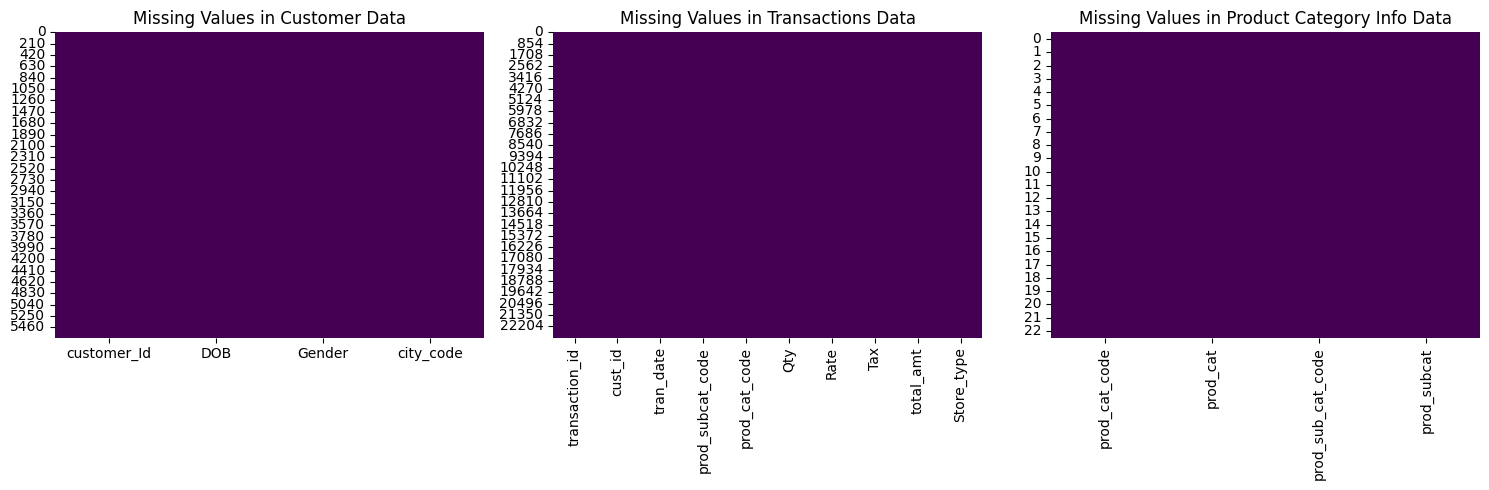

In [13]:
# Visualize missing values
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(customer_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Customer Data")
plt.subplot(1, 3, 2)
sns.heatmap(transactions_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Transactions Data")
plt.subplot(1, 3, 3)
sns.heatmap(prod_cat_info_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Product Category Info Data")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, kita melakukan preprocessing untuk memastikan kualitas data sebelum digunakan. Data mentah sering kali mengandung nilai kosong, duplikasi, atau format yang tidak konsisten. Proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

### 5.1 Menggabungkan Datasets
Langkah pertama dalam preprocessing adalah menggabungkan ketiga DataFrame (`customer_df`, `transactions_df`, `prod_cat_info_df`) menjadi satu DataFrame tunggal (`full_df`). Penggabungan ini dilakukan agar semua informasi relevan (pelanggan, transaksi, dan produk) berada dalam satu tabel, yang memudahkan analisis dan pemodelan.

In [14]:
# Merging dataframes
customer_transactions = pd.merge(customer_df, transactions_df, left_on='customer_Id', right_on='cust_id', how='inner')
full_df = pd.merge(customer_transactions, prod_cat_info_df, left_on='prod_cat_code', right_on='prod_cat_code', how='inner')

print("Merged DataFrame head:")
full_df.head()

Merged DataFrame head:


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics


In [15]:
print("Merged DataFrame Info:")
full_df.info()

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        99293 non-null  int64  
 1   DOB                99293 non-null  object 
 2   Gender             99253 non-null  object 
 3   city_code          99257 non-null  float64
 4   transaction_id     99293 non-null  int64  
 5   cust_id            99293 non-null  int64  
 6   tran_date          99293 non-null  object 
 7   prod_subcat_code   99293 non-null  int64  
 8   prod_cat_code      99293 non-null  int64  
 9   Qty                99293 non-null  int64  
 10  Rate               99293 non-null  int64  
 11  Tax                99293 non-null  float64
 12  total_amt          99293 non-null  float64
 13  Store_type         99293 non-null  object 
 14  prod_cat           99293 non-null  object 
 15  prod_sub_cat_code  99293 non-null  int64  
 16 

### 5.2 Menangani Nilai Hilang (Missing Values)
Setelah digabungkan, kita memeriksa kembali nilai yang hilang. Ditemukan beberapa baris dengan data yang tidak lengkap. Untuk kesederhanaan, kita memilih untuk menghapus baris-baris ini menggunakan `.dropna()`. Pendekatan yang lebih kompleks seperti imputasi (mengisi nilai yang hilang dengan mean, median, atau modus) dapat dipertimbangkan jika jumlah data yang hilang signifikan.

In [16]:
# Handle missing values (example: fill with mode for categorical, mean/median for numerical)
# For simplicity, let's drop rows with any missing values for now. A more robust approach would be imputation.
initial_rows = full_df.shape[0]
full_df.dropna(inplace=True)
print(f"Dropped {initial_rows - full_df.shape[0]} rows with missing values.")

Dropped 76 rows with missing values.


### 5.3 Konversi Tipe Data Tanggal

Pada tahap ini, kolom 'DOB' (tanggal lahir) dan 'tran_date' (tanggal transaksi) dikonversi ke tipe data datetime. Konversi ini penting agar kita dapat melakukan analisis berbasis waktu, seperti menghitung usia pelanggan atau umur transaksi.

In [17]:
full_df["DOB"] = pd.to_datetime(full_df["DOB"], errors="coerce", dayfirst=True)
full_df["tran_date"] = pd.to_datetime(full_df["tran_date"], errors="coerce", dayfirst=True)

### 5.4 Feature Engineering dan Encoding

Pada tahap ini dilakukan pembuatan fitur baru, seperti menghitung usia pelanggan dan umur transaksi. Selain itu, variabel kategorikal seperti 'Gender', 'prod_cat', dan 'prod_subcat' diubah menjadi bentuk numerik menggunakan teknik one-hot encoding agar dapat digunakan dalam pemodelan machine learning.

In [18]:
# Feature Engineering: Calculate age and transaction age
current_date = datetime.now()
full_df["age"] = (current_date.year - full_df["DOB"].dt.year) - ((current_date.month < full_df["DOB"].dt.month) | ((current_date.month == full_df["DOB"].dt.month) & (current_date.day < full_df["DOB"].dt.day)))
full_df["transaction_age"] = (current_date - full_df["tran_date"]).dt.days

# Encoding categorical variables (example: One-Hot Encoding for \'Gender\', \'prod_cat\', \'prod_subcat\')
full_df = pd.get_dummies(full_df, columns=['Gender', 'prod_cat', 'prod_subcat'], drop_first=True)

# Drop original ID columns and other columns not needed for modeling
full_df.drop(columns=['customer_Id', 'cust_id', 'prod_cat_code', 'prod_sub_cat_code', 'DOB', 'tran_date'], inplace=True)

In [19]:
full_df.head()

,city_code,transaction_id,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type,age,transaction_age,...,prod_subcat_Fiction,prod_subcat_Furnishing,prod_subcat_Kids,prod_subcat_Kitchen,prod_subcat_Mens,prod_subcat_Mobiles,prod_subcat_Non-Fiction,prod_subcat_Personal Appliances,prod_subcat_Tools,prod_subcat_Women
0,4.0,87243835584,7,5,187,98.175,1033.175,TeleShop,55,4185.0,...,True,False,False,False,False,False,False,False,False,False
1,4.0,87243835584,7,5,187,98.175,1033.175,TeleShop,55,4185.0,...,False,False,False,False,False,False,False,False,False,False
2,4.0,87243835584,7,5,187,98.175,1033.175,TeleShop,55,4185.0,...,False,False,False,False,False,False,True,False,False,False
3,4.0,87243835584,7,5,187,98.175,1033.175,TeleShop,55,4185.0,...,False,False,False,False,False,False,False,False,False,False
4,4.0,87243835584,7,5,187,98.175,1033.175,TeleShop,55,4185.0,...,False,False,False,False,False,False,False,False,False,False


In [20]:
print("Preprocessed DataFrame Info:")
full_df.info()

Preprocessed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 99217 entries, 0 to 99292
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   city_code                        99217 non-null  float64
 1   transaction_id                   99217 non-null  int64  
 2   prod_subcat_code                 99217 non-null  int64  
 3   Qty                              99217 non-null  int64  
 4   Rate                             99217 non-null  int64  
 5   Tax                              99217 non-null  float64
 6   total_amt                        99217 non-null  float64
 7   Store_type                       99217 non-null  object 
 8   age                              99217 non-null  int32  
 9   transaction_age                  59818 non-null  float64
 10  Gender_M                         99217 non-null  bool   
 11  prod_cat_Books                   99217 non-null  bool   

Pada tahap ini, kita telah menyelesaikan proses preprocessing data. Data telah dibersihkan dari nilai hilang, tipe data tanggal telah dikonversi, fitur baru seperti usia pelanggan dan umur transaksi telah ditambahkan, serta variabel kategorikal telah diubah menjadi bentuk numerik menggunakan one-hot encoding. Data yang telah diproses ini siap digunakan untuk analisis lebih lanjut atau pemodelan machine learning.

In [21]:
# Save the preprocessed data
full_df.to_csv("salesdata_preprocessing/preprocessed_data.csv", index=False)